+-------+-------+------+-------------------+
|MovieID|User ID|Rating|          Timestamp|
+-------+-------+------+-------------------+
|      1|      1|     5|2023-01-01 10:00:00|
|      1|      2|     4|2023-01-02 11:00:00|
|      2|      1|     3|2023-01-03 12:00:00|
|      2|      3|     5|2023-01-04 13:00:00|
|      3|      2|     2|2023-01-05 14:00:00|
|      3|      3|     4|2023-01-06 15:00:00|
|      4|      1|     5|2023-01-07 16:00:00|
|      4|      2|     3|2023-01-08 17:00:00|
|      4|      3|     4|2023-01-09 18:00:00|
+-------+-------+------+-------------------+

+-------+-------------+
|MovieID|AverageRating|
+-------+-------------+
|      1|          4.5|
|      2|          4.0|
|      3|          3.0|
|      4|          4.0|
+-------+-------------+

+-------+-----------+
|User ID|RatingCount|
+-------+-----------+
+-------+-----------+

+-------+-------------+
|MovieID|AverageRating|
+-------+-------------+
|      1|          4.5|
|      2|          4.0|
|      4|   

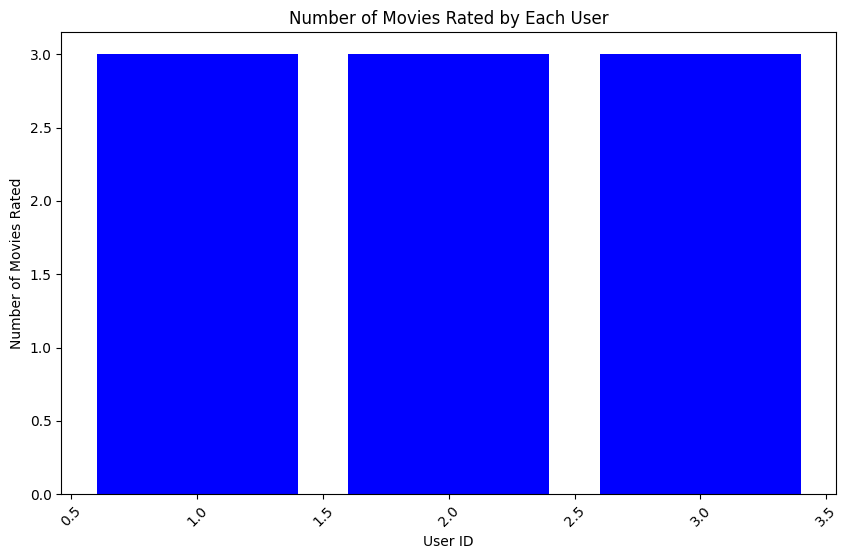

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType
from datetime import datetime

spark = SparkSession.builder \
    .appName("Movie Ratings Analysis") \
    .getOrCreate()

schema = StructType([
    StructField("MovieID", IntegerType(), True),
    StructField("User ID", IntegerType(), True),
    StructField("Rating", IntegerType(), True),
    StructField("Timestamp", TimestampType(), True)
])

data = [
    (1, 1, 5, datetime(2023, 1, 1, 10, 0, 0)),
    (1, 2, 4, datetime(2023, 1, 2, 11, 0, 0)),
    (2, 1, 3, datetime(2023, 1, 3, 12, 0, 0)),
    (2, 3, 5, datetime(2023, 1, 4, 13, 0, 0)),
    (3, 2, 2, datetime(2023, 1, 5, 14, 0, 0)),
    (3, 3, 4, datetime(2023, 1, 6, 15, 0, 0)),
    (4, 1, 5, datetime(2023, 1, 7, 16, 0, 0)),
    (4, 2, 3, datetime(2023, 1, 8, 17, 0, 0)),
    (4, 3, 4, datetime(2023, 1, 9, 18, 0, 0))
]

ratings_df = spark.createDataFrame(data, schema)
ratings_df.show()


average_ratings = ratings_df.groupBy("MovieID").agg(F.avg("Rating").alias("AverageRating"))
average_ratings.show()

user_rating_counts = ratings_df.groupBy("User ID").agg(F.count("MovieID").alias("RatingCount"))
active_users = user_rating_counts.filter(user_rating_counts.RatingCount > 5)
active_users.show()

top_movies = average_ratings.orderBy("AverageRating", ascending=False).limit(5)
top_movies.show()

import matplotlib.pyplot as plt

user_rating_counts_pd = user_rating_counts.toPandas()

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType
from datetime import datetime

spark = SparkSession.builder \
    .appName("Movie Ratings Analysis") \
    .getOrCreate()

schema = StructType([
    StructField("MovieID", IntegerType(), True),
    StructField("User ID", IntegerType(), True),
    StructField("Rating", IntegerType(), True),
    StructField("Timestamp", TimestampType(), True)
])

data = [
    (1, 1, 5, datetime(2023, 1, 1, 10, 0, 0)),
    (1, 2, 4, datetime(2023, 1, 2, 11, 0, 0)),
    (2, 1, 3, datetime(2023, 1, 3, 12, 0, 0)),
    (2, 3, 5, datetime(2023, 1, 4, 13, 0, 0)),
    (3, 2, 2, datetime(2023, 1, 5, 14, 0, 0)),
    (3, 3, 4, datetime(2023, 1, 6, 15, 0, 0)),
    (4, 1, 5, datetime(2023, 1, 7, 16, 0, 0)),
    (4, 2, 3, datetime(2023, 1, 8, 17, 0, 0)),
    (4, 3, 4, datetime(2023, 1, 9, 18, 0, 0))
]

ratings_df = spark.createDataFrame(data, schema)
ratings_df.show()

average_ratings = ratings_df.groupBy("MovieID").agg(F.avg("Rating").alias("AverageRating"))
average_ratings.show()

user_rating_counts = ratings_df.groupBy("User ID").agg(F.count("MovieID").alias("RatingCount"))
active_users = user_rating_counts.filter(user_rating_counts.RatingCount > 5)
active_users.show()

top_movies = average_ratings.orderBy("AverageRating", ascending=False).limit(5)
top_movies.show()

import matplotlib.pyplot as plt

user_rating_counts_pd = user_rating_counts.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(user_rating_counts_pd['User ID'], user_rating_counts_pd['RatingCount'], color='blue')
plt.xlabel('User ID')
plt.ylabel('Number of Movies Rated')
plt.title('Number of Movies Rated by Each User')
plt.xticks(rotation=45)
plt.show()
